# Required Files

There are two required files: the station key and the template key (referred to as "keys"). Both are usually saved as csv files for ease of editing/viewing.

## Station Key

The station key is used to tell detex which stations and channels to use. The location of the station and a desired time frame are also included. 

Here is an example from the introductory tutorial:


| NETWORK | STATION | STARTTIME | ENDTIME | LAT | LON | ELEVATION | CHANNELS |
|:----------:|:-----------:|:------------:| :-: | :-: | :-: | :-: | :-: |
| TA | M18A	| 2009-04-01T00:00:00 | 2009-04-04T00:00:00	| 41.4272 | -110.0674 | 2103 | BHE-BHN-BHZ |
| TA | M17A	| 2009-04-01T00:00:00 | 2009-04-04T00:00:00	| 41.4729 | - 110.6664 | 2101 | BHE-BHN-BHZ |


The STARTTIME and ENDTIME fields indicated the time range of the continuous data and can be in any format readable by the obspy.UTCDateTime class including a time stamp (ie epoch time). If you do use an epoch time be careful when editing outside of python because programs like excel tend to round large numbers without tell you. 


See the [obspy.UTCDateTime docs](http://docs.obspy.org/packages/autogen/obspy.core.utcdatetime.UTCDateTime.html) for more info on readable formats. 

The CHANNELS field should list the channels that will be used for each station separated by a dash (-).

The LAT, LON, and ELEVATION fields give the stations location in global coordinates (elevation is in meters).

The order of the headers is not important. Additionally, extra fields can be added without affecting Detex's ability to read the file. If you need to keep track of location for example, simply add a location field.

## Template Key

The template key is usually saved as TemplateKey.csv. It contains information on each of the events that will be used by detex. 

Here is an example from the introductory tutorial:

| CONTRIBUTOR | NAME | TIME | LAT | LON | DEPTH | MTYPE | MAG |
| :--: | :--: | :--: | :--: | :--: |:--: | :--: |:--: |
| ANF | 2007-12-19T17-56-18 | 2007-12-19T17-56-18 | 41.7205	| -110.6486	| 4.07 | ML | 2.36 |
| ANF | 2007-12-21T18-30-09	| 2007-12-21T18-30-09 | 41.7669	| -110.6122	| 8.97 | ML | 2.17 |
| ANF | 2007-12-21T18-30-09	| 2007-12-21T18-30-09 | 41.7669	| -110.6122	| 8.97 | ML	| 2.17 |

The NAME field can be any string that can also be used as a file name by your OS. Windows does not allow ":" in a file path so the ":" between the hour and minute, and between the minute and seconds, have been replaced with a "-".

The TIME field, just like the STARTTIME and ENDTIME fields in the station key can be any obspy readable objects. 

The MAG field is required for estimating magnitudes of newly detected events. 

The LAT, LON, and DEPTH fields are not strictly required for basic Detex functionality, but are used in some visualization methods. 

The CONTRIBUTOR and MTYPE fields are not used by detex but can be useful for record keeping. Additionally, just as with the station key, any extra fields can be added in order to better keep track of the events. 

# Generating Keys

As long as the comma separated format shown above is followed you can use any method you like to create the keys. For small data sets it may be suitable to create the keys by hand in a text editor or in a program like excel. For larger data sets, however, it is useful to either use some of the built in functions to generate the keys or create your own script to do so. 

The following shows a few of the built in methods for generating the keys but it can often be an excellent exercise in python, especially for those new in the language, to generate these files yourself. If you do write such a script or function that uses some data source detex currently cannot use consider contributing it to the detex.util module as others will probably find it useful as well. 

## Generating Station Keys

Currently there are no methods to generate a station key automatically. The format, however, is very similar to that produced by the [IRIS station query](https://ds.iris.edu/SeismiQuery/station.htm). If you elect to have the results emailed to you it becomes a trivial to make a station key from the email. In the future I hope to add a method that makes a station key from station inventories (which can be created from seed volumnes). 

## Generating Template Keys

There are two methods for generating template keys. The first uses an obspy catalog oject as input. The following example follows the [obspy FDSN tutorial](https://docs.obspy.org/packages/obspy.fdsn.html) closely. 


In [9]:
import detex
import obspy
from obspy.fdsn import Client
%pylab inline

client = Client("IRIS") # use IRIS client

starttime = obspy.UTCDateTime('2012-05-03')
endtime = obspy.UTCDateTime('2012-05-20')

cat = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=3, catalog='ANF')


Populating the interactive namespace from numpy and matplotlib


In [10]:
print cat.__str__(print_all=True) # see how many events there are


30 Event(s) in Catalog:
2012-05-19T19:22:15.980000Z | +32.526, -115.644 | 3.0 ML
2012-05-19T07:39:24.770000Z | +44.316, -105.185 | 3.7 ML
2012-05-18T18:19:49.700000Z | +43.652, -105.192 | 3.5 ML
2012-05-18T16:51:17.000000Z | +37.203, -118.113 | 3.0 ML
2012-05-18T16:27:54.710000Z | +47.543,  -92.578 | 3.1 ML
2012-05-18T10:37:12.020000Z | +33.319, -116.402 | 3.4 ML
2012-05-17T08:12:00.990000Z | +31.926,  -94.369 | 5.5 ML
2012-05-15T10:19:32.840000Z | +40.453, -125.307 | 3.4 ML
2012-05-11T23:39:09.750000Z | +43.106, -105.043 | 3.6 ML
2012-05-11T07:52:07.490000Z | +35.035,  -97.699 | 3.8 ML
2012-05-11T06:19:32.280000Z | +32.093, -115.736 | 3.8 ML
2012-05-11T04:37:50.000000Z | +35.512,  -96.788 | 3.1 ML
2012-05-10T22:54:04.530000Z | +38.825,  -87.464 | 4.0 ML
2012-05-10T22:07:19.900000Z | +38.816,  -87.465 | 3.2 ML
2012-05-10T21:14:31.000000Z | +35.510,  -96.781 | 5.0 ML
2012-05-10T20:31:12.470000Z | +33.764,  -87.201 | 3.1 ML
2012-05-10T15:15:38.840000Z | +31.964,  -94.465 | 4.7 ML
2012-05

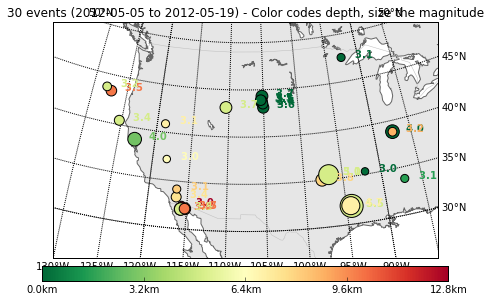

In [11]:
cat.plot(projection="local") # see where these events locate

now to use this catalog as a template key we simply need to call the catalog2TemplateKey function of detex.util

In [12]:
temkey = detex.util.catalog2Templatekey(cat) # get template key as DataFrame
temkey.to_csv('TemplateKey.csv', index=False) # save as csv

In [13]:
temkey

,NAME,TIME,LAT,LON,DEPTH,MAG,MTYPE,CONTRIBUTOR,STATIONKEY
0,2012-05-19T19-22-15,2012-05-19T19-22-15.980,32.5255,-115.644,12.8,3.0,ML,SCEDC,StationKey.csv
1,2012-05-19T07-39-24,2012-05-19T07-39-24.770,44.316,-105.185,0.0,3.7,ML,NEIC,StationKey.csv
2,2012-05-18T18-19-49,2012-05-18T18-19-49.700,43.652,-105.192,0.0,3.5,ML,NEIC,StationKey.csv
3,2012-05-18T16-51-17,2012-05-18T16-51-17.000,37.2025,-118.1131,6.5,3.0,ML,UNR,StationKey.csv
4,2012-05-18T16-27-54,2012-05-18T16-27-54.710,47.5434,-92.5776,0.0,3.1,ML,ANF,StationKey.csv
5,2012-05-18T10-37-12,2012-05-18T10-37-12.020,33.3195,-116.4022,7.5,3.4,ML,SCEDC,StationKey.csv
6,2012-05-17T08-12-00,2012-05-17T08-12-00.990,31.926,-94.369,5.0,5.5,ML,PDE-Q,StationKey.csv
7,2012-05-15T10-19-32,2012-05-15T10-19-32.840,40.4525,-125.3068,5.0,3.4,ML,NCEDC,StationKey.csv
8,2012-05-11T23-39-09,2012-05-11T23-39-09.750,43.106,-105.043,0.0,3.6,ML,NEIC,StationKey.csv
9,2012-05-11T07-52-07,2012-05-11T07-52-07.490,35.035,-97.6986,7.9,3.8,ML,ANF,StationKey.csv


The other function used to make a template key is only useful at the Unviversity of Utah where a program called EQsearch is used to query the UUSS catalog. EQsearch produces a file, by defualt, called eqsrchsum. The function EQSearch2TemplateKey is a parser that takes the information from this file and converts it to a template key. 

# Reading Keys

All detex functions and classes that use a key file utilize the detex.util.readKey function to read in the key file (either template key, station key, or phase file) and make sure all the required fields are there. If you want to verify that a key file you made is in the correct format simply try and read it in with the readKey function. 

In [14]:
temkey = detex.util.readKey('TemplateKey.csv', key_type='template')

/home/derrick/anaconda/lib/python2.7/site-packages/detex/util.py:569: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort(columns=list(req_columns[key_type]), inplace=True)
